In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
dataset = pd.read_csv('appl_1980_2014.csv')

In [4]:
dataset.shape

(8465, 7)

In [5]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [19]:
X = dataset.iloc[:,1:5].values
y = dataset['Adj Close'].values

In [20]:
X.shape

(8465, 4)

In [21]:
X0 = np.ones(len(X))
X = np.array([X0,X[:,0],X[:,1],X[:,2],X[:,3]]).T
B = np.zeros(X.shape[1])

In [22]:
X.shape

(8465, 5)

In [23]:
B.shape

(5,)

In [26]:
n = len(X)

In [57]:
def costFunction(X,B,y):
    J = (np.sum((np.dot(X,B)) - y) ** 2) / 2*n
    return J

In [58]:
costFunction(X,B,y)

37334175816845.6

In [59]:
def gradientDescent(X,B,y,epochs,learningRate):
    costHistory = [0] * epochs
    for epoch in range(epochs):
        y_pred = np.dot(X,B)
        loss = y_pred - y
        grad = X.T.dot(loss) / n
        B = B - learningRate * grad
        cost = costFunction(X,B,y)
        costHistory[epoch] = cost
    return costHistory,B

In [ ]:
cost,b = gradientDescent(X,B,y,5000000,0.00001)

In [85]:
cost[-10:]

[289942326905.8164,
 289938430376.3689,
 289934533906.8916,
 289930637497.3914,
 289926741147.8575,
 289922844858.29443,
 289918948628.69794,
 289915052459.07587,
 289911156349.4127,
 289907260299.71893]

In [86]:
b

array([-1.45629976,  0.07355073, -0.42411023,  0.36266817,  0.13559866])

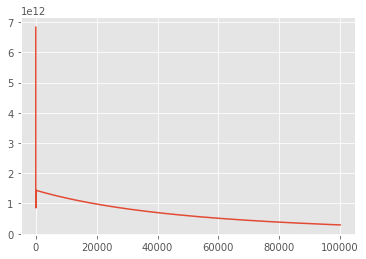

In [89]:
x = [i for i in range(100000)]
plt.plot(x,cost)

In [95]:
y_pred = X.dot(b)

In [96]:
y_pred[0]

11.56168658775194

In [97]:
y[0]

95.35

In [ ]:
y_pred